In [2]:
import numpy as np 
import matplotlib.pyplot as plt 

In [18]:
def estimate_acc(num_rounds, alpha, beta=0):
    eps_f = 1e-2 

    x = np.arange(num_rounds)
    estimated_eps = (2 - np.exp(1/(alpha*(x + beta))))

    accumulated_eps = 1 
    required_eps = []
    for i in range(num_rounds):
        accumulated_eps *= estimated_eps[i]
        required_eps.append(eps_f/accumulated_eps)

    return required_eps

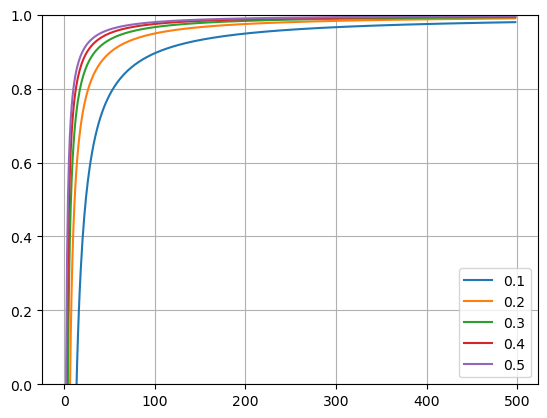

In [6]:
N = 500
x = np.arange(N)[1:]
alpha = [0.1, 0.2, 0.3, 0.4, 0.5]
plt.figure(1)
for i in range(len(alpha)): 
    plt.plot(relay(alpha[i], x), label=f'{alpha[i]}')

plt.ylim(0, 1.0)
plt.legend()
plt.grid()
plt.show()

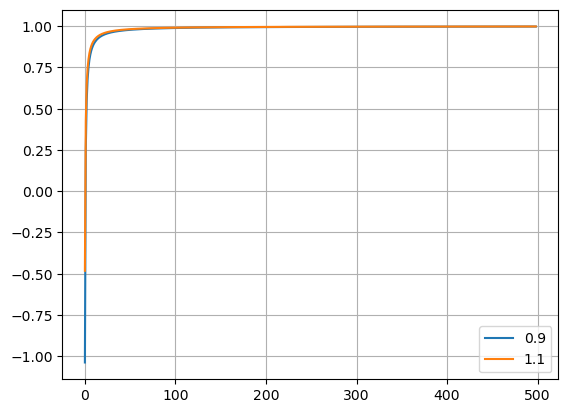

In [4]:
N = 500
x = np.arange(N)[1:]
alpha = [0.9, 1.1]
plt.figure(1)
for i in range(len(alpha)): 
    plt.plot(relay(alpha[i], x), label=f'{alpha[i]}')

# plt.ylim(0, 1.0)
plt.legend()
plt.grid()
plt.show()

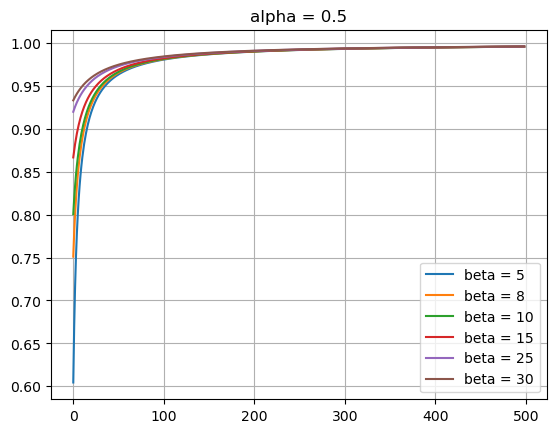

In [9]:
import matplotlib.pyplot as plt 

N = 500
x = np.arange(N)[1:]
alpha = 0.5
beta = [5, 8, 10, 15, 25, 30]

plt.figure(1)
for i in range(len(beta)): 
    plt.plot(estimate_acc(alpha, x, beta[i]), label=f'beta = {beta[i]}')
plt.title(f"alpha = {alpha}")
# plt.ylim(0, 1.0)
plt.legend()
plt.grid()
plt.show()

In [42]:
def estimate_acc(num_rounds, coeff=np.exp(1), alpha=0.9, beta=0):
    eps_f = 1e-2 

    x = np.arange(num_rounds)
    estimated_eps = (2 - coeff**(1/(alpha*(x + beta))))

    accumulated_eps = 1 
    required_eps = []
    for i in range(num_rounds):
        accumulated_eps *= estimated_eps[i]
        required_eps.append(eps_f/accumulated_eps)
    
    return required_eps

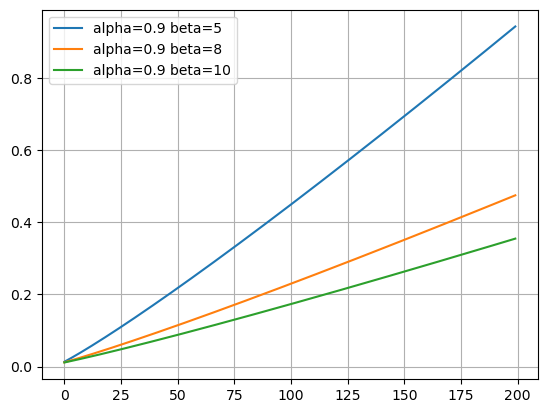

In [43]:
eps_f = 1e-2 
num_rounds = 200


alphas = [0.9]
betas = [5, 8, 10]


plt.figure()

for alpha in alphas: 
    for beta in betas: 
        required_eps = estimate_acc(num_rounds=num_rounds, alpha=alpha, beta=beta)
        plt.plot(required_eps, label=f'alpha={alpha} beta={beta}')

plt.legend()
# plt.ylim(0, 1)
plt.grid()

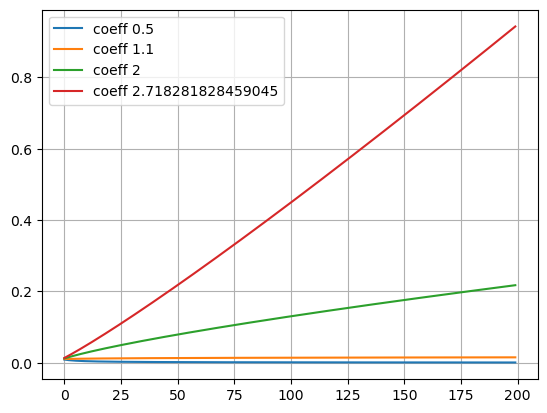

In [45]:
coeffs = [0.5, 1.1, 2, np.exp(1)]
num_rounds = 200 

plt.figure()
for coeff in coeffs: 
    required_eps = estimate_acc(num_rounds=num_rounds, coeff=coeff, beta=5)
    plt.plot(required_eps, label=f'coeff {coeff}')

plt.legend()
# plt.ylim(0, 1)
plt.grid()